# CX SCORE ANALYSIS

In [12]:
import pandas as pd
import importlib
import structural_analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
cx_data = pd.read_csv('/cluster/gjb_lab/2394007/merged_cons_final.csv') #37793 

/cluster/gjb_lab/2394007/miniconda/envs/myenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,19,26,28,51,52,122,123,132,133,142,143,149,169,230,239,279) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
cx_data.head()

,AA_A,AA_B,ACC_A,ACC_B,ACC_UNB_A,ACC_UNB_B,ALPHA_A,ALPHA_B,ATOM_A,ATOM_B,...,validation_validate_B,experiment_B,resolution_B,pdb_id,label_asym_id,label_seq_id,res_cx_min,res_cx_mean,res_cx_median,res_cx_max
0,L,E,21.0,69.0,21.0,105.0,43.8,47.9,CD2,OE1,...,NaN,X-RAY DIFFRACTION,1.9,3w9f,C,360,1.262117,1.551809,1.593041,1.769402
1,I,E,1.0,69.0,1.0,105.0,51.3,47.9,O,N,...,NaN,X-RAY DIFFRACTION,1.9,3w9f,C,375,1.110355,1.388210,1.369880,1.676052
2,I,E,60.0,69.0,60.0,105.0,47.2,47.9,O,N,...,NaN,X-RAY DIFFRACTION,1.9,3w9f,C,376,1.825729,2.115135,2.101733,2.444587
3,R,E,149.0,69.0,149.0,105.0,53.6,47.9,C,N,...,NaN,X-RAY DIFFRACTION,1.9,3w9f,C,377,2.116225,2.347505,2.334360,2.554755
4,Q,A,23.0,1.0,23.0,1.0,-165.9,59.6,C,N,...,NaN,X-RAY DIFFRACTION,1.9,3w9f,A,225,0.449722,0.582322,0.587791,0.804308


In [8]:
cons_cols_allsp = structural_analysis.get_cons_cols('/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/anks_final_aln.sto', 'stockholm')

In [9]:
cx_scores_df = structural_analysis.get_cx_score_consensus(cx_data, cons_cols_allsp)

The dataframe contains information of:
37793 residues, 10398 of which are unique
160 PDB structures
70 different proteins
359 unique repeats


In [10]:
buried_res = [4, 5, 6, 7, 9, 10, 17, 18, 21]

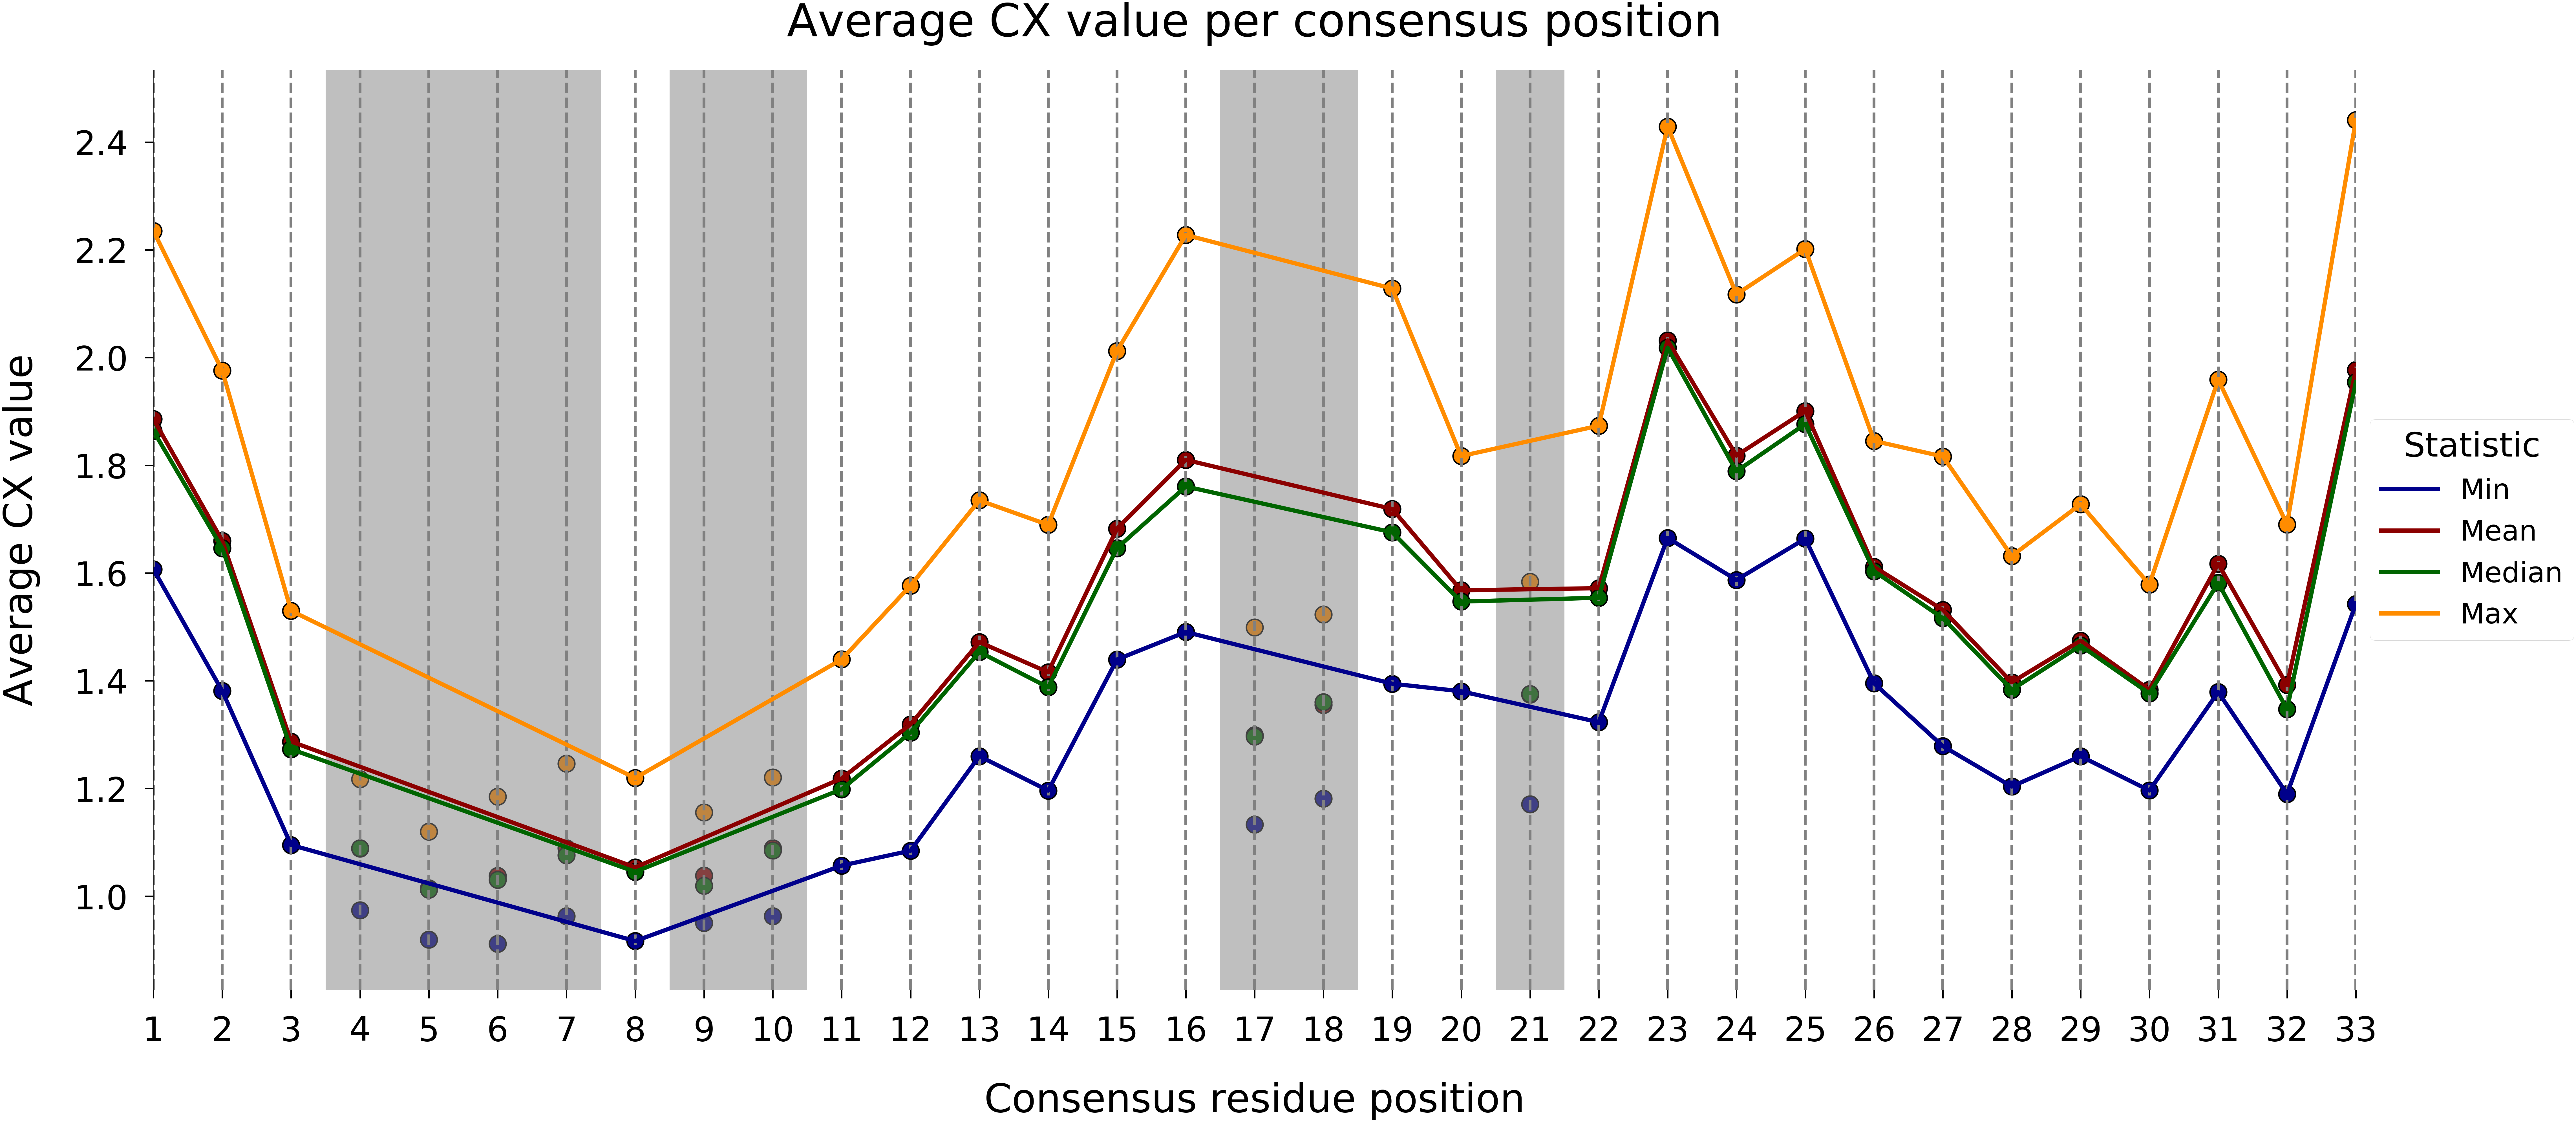

In [11]:
structural_analysis.plot_cx_consensus(cx_scores_df, buried_res, out = None)

In [23]:
def plot_cx_consensus2(df, buried_res, out = None):
    df_not_buried = df[~df.index.isin(buried_res)]
    n = len(df)
    plt.figure(figsize=(140,60))
    plt.rcParams['axes.linewidth'] = 10
    for x in range(1,n+1):
        plt.axvline(x, linewidth = 10, color = 'grey',linestyle = '--')   
    plt.axvspan(1, 1.5, facecolor='darkred', alpha=0.5)
    plt.axvspan(1.5, 2.5, facecolor='darkgreen', alpha=0.5)
    plt.axvspan(2.5, 3.5, facecolor='darkred', alpha=0.5)
    plt.axvspan(3.5, 7.5, facecolor='mediumblue', alpha=0.5)
    plt.axvspan(7.5, 8.5, facecolor='darkred', alpha=0.5)
    plt.axvspan(8.5, 10.5, facecolor='mediumblue', alpha=0.5)
    plt.axvspan(10.5, 14.5, facecolor='darkred', alpha=0.5)
    plt.axvspan(14.5, 16.5, facecolor='orange', alpha=0.5)
    plt.axvspan(16.5, 18.5, facecolor='mediumblue', alpha=0.5)
    plt.axvspan(18.5, 20.5, facecolor='orange', alpha=0.5)
    plt.axvspan(20.5, 21.5, facecolor='mediumblue', alpha=0.5)
    plt.axvspan(21.5, 22.5, facecolor='orange', alpha=0.5)
    plt.axvspan(22.5, 24.5, facecolor='orange', alpha=0.5)
    plt.axvspan(24.5, 31.5, facecolor='darkgreen', alpha=0.5)
    plt.axvspan(31.5, 33, facecolor='darkred', alpha=0.5)
    sns.lineplot(df_not_buried.index, df_not_buried.res_cx_mean_mean, color = 'black', linewidth = 15)#, label = 'Mean')
    sns.scatterplot(df.index, df.res_cx_mean_mean, color = 'black', s = 3500, edgecolor = 'black', linewidth = 5)
    plt.title('Average CX value per consensus position', pad = 120, fontsize = 160)
    plt.xlabel('Consensus residue position', labelpad = 120, fontsize = 140)
    plt.ylabel('Average CX value', labelpad = 120, fontsize = 140)
    plt.tick_params(axis= 'both' , which = 'major', pad = 60, labelsize = 120,width = 5, length = 30)
    plt.xticks(np.arange(1,n+1,1))
    plt.xlim(1,n)
    if out != None:
        plt.savefig(out)
    plt.show()

## SURFACE CLASSIFICATION

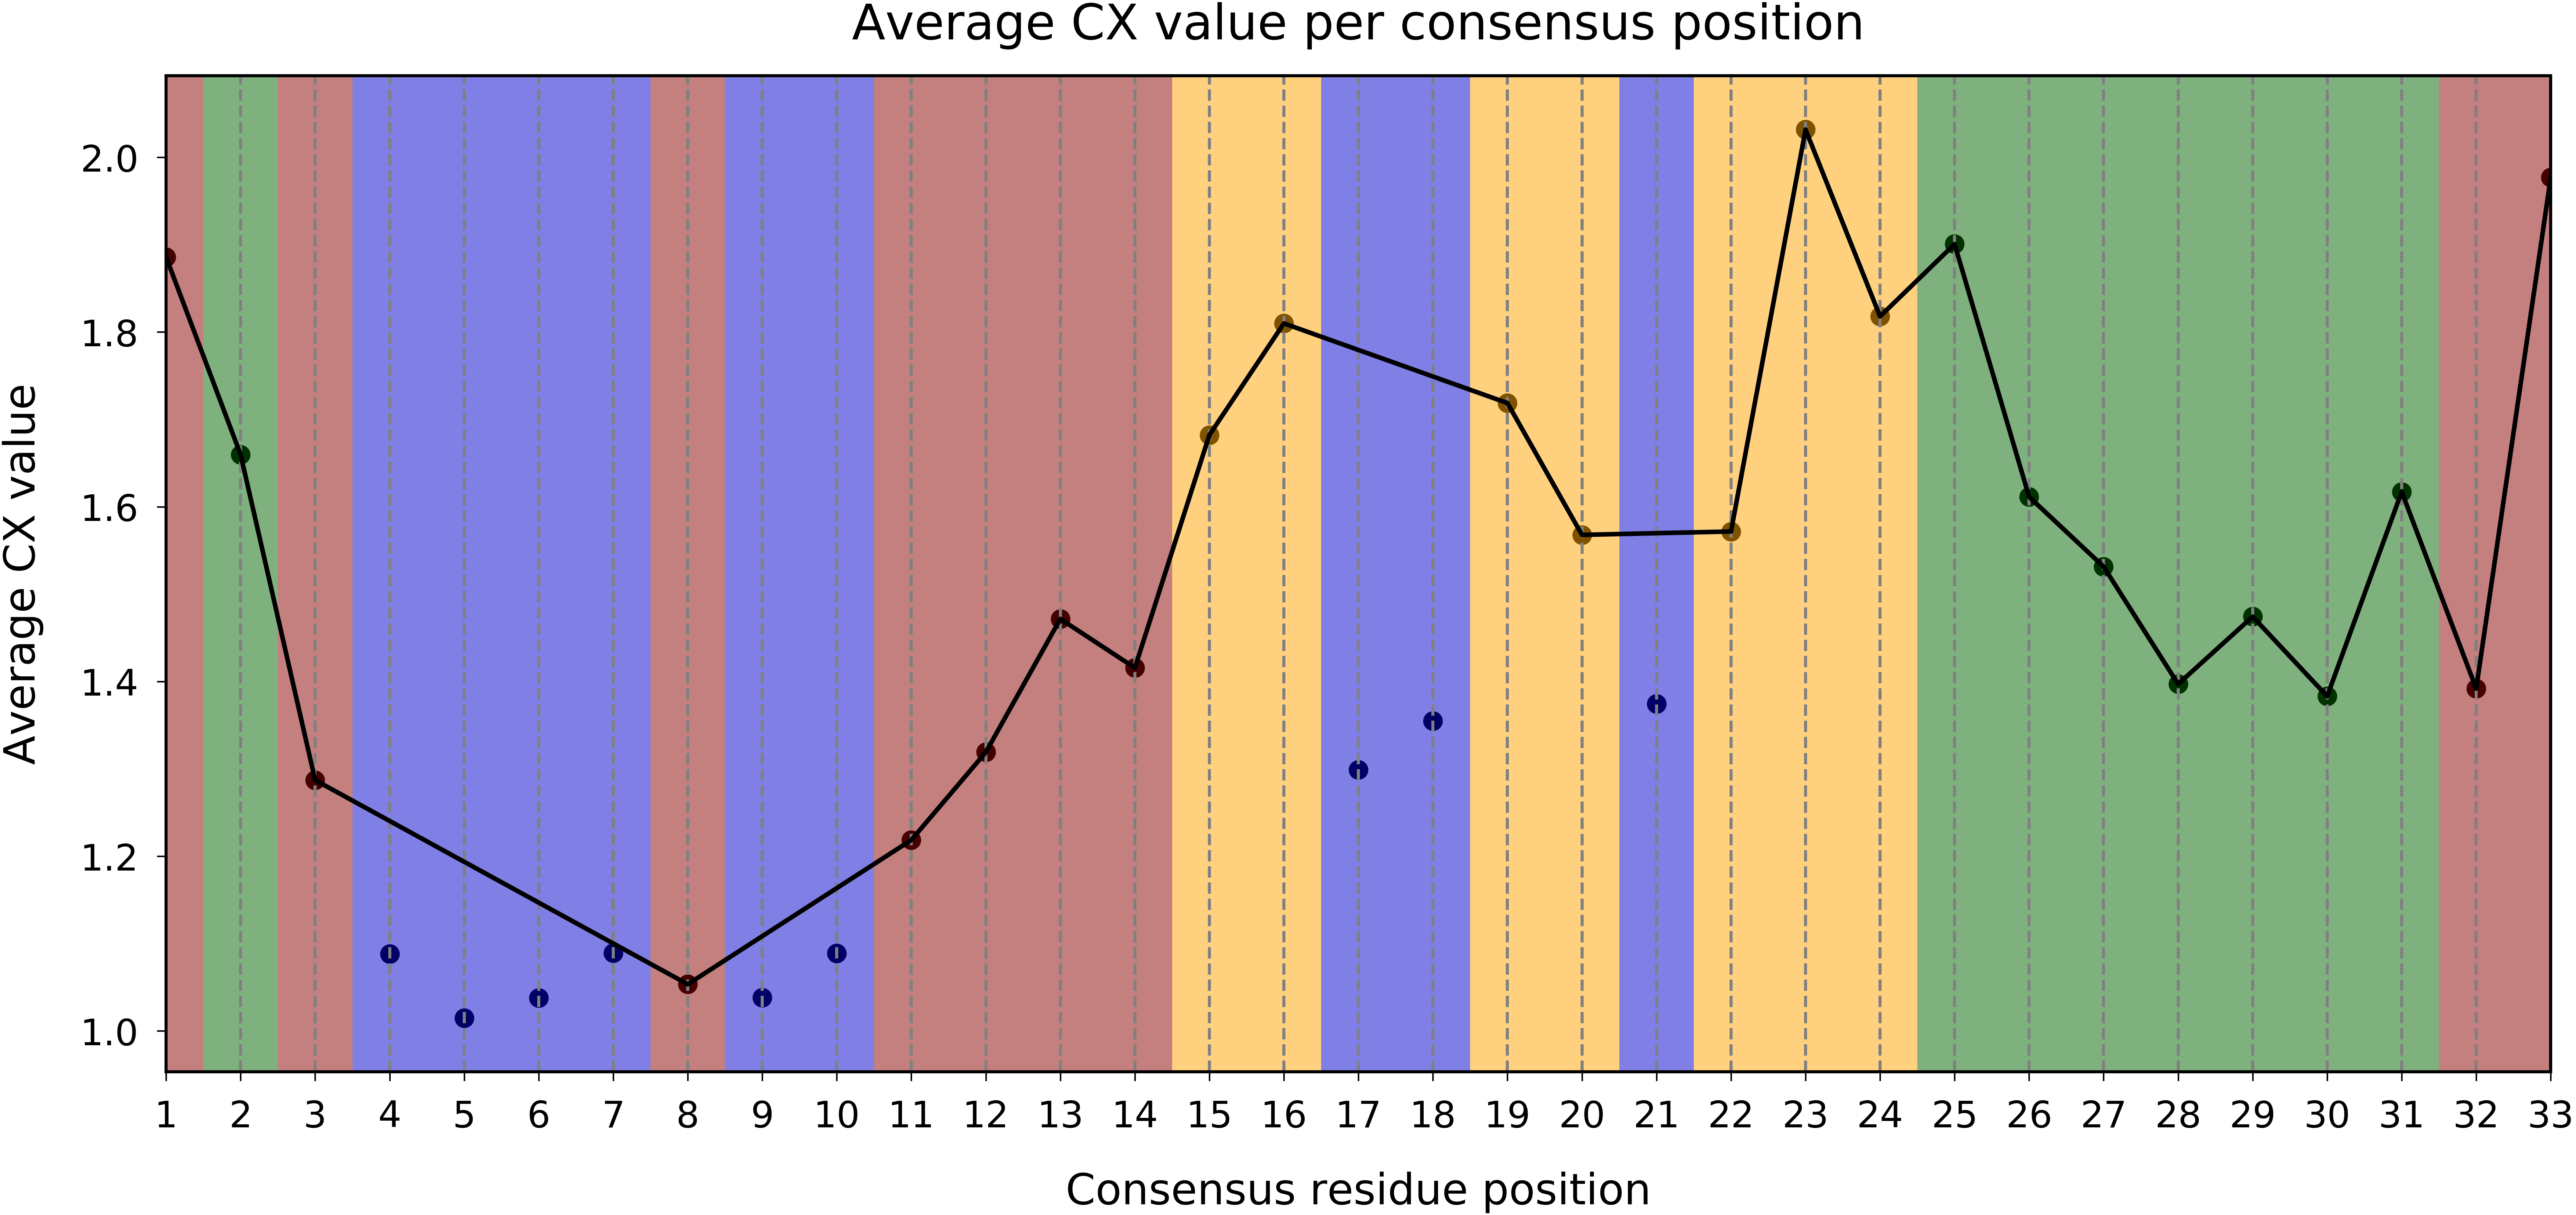

In [24]:
plot_cx_consensus2(cx_scores_df, buried_res)

In [27]:
cx_scores_df.res_cx_mean_mean.tolist()

[1.8856816211307061,
 1.659675782089367,
 1.2870893262707075,
 1.0883252513133714,
 1.0149246543604902,
 1.0379375320893351,
 1.089158394560468,
 1.0534608737293019,
 1.0382927897828071,
 1.0889696260685466,
 1.218570251386872,
 1.3190723832633824,
 1.4716571323268208,
 1.4156428437031967,
 1.6821796706264776,
 1.8099136488943026,
 1.29898208963568,
 1.3549529817148793,
 1.7187088850570915,
 1.5678360353074097,
 1.374513071257187,
 1.5717213298478352,
 2.0317464956315727,
 1.8178883320224013,
 1.9006360523526808,
 1.6113922354530799,
 1.5314698161970424,
 1.3970783639092634,
 1.4742638588630124,
 1.3831225438927208,
 1.617158653183737,
 1.3919159473940959,
 1.9768713359979664]